The following uses the Python SDK, with [docs here](https://docs.data.nasdaq.com/docs/python). 

In [5]:
# !pip install nasdaq-data-link
import nasdaqdatalink
import os
import matplotlib.pyplot as plt

In [27]:
# to turn off the automatically truncated colwidth 
import pandas as pd
pd.set_option('max_colwidth', None)

In [1]:
# !setx NASDAQ_DATA_LINK_API_KEY [...] note that there's no %, quotation, or = sign


SUCCESS: Specified value was saved.


In [11]:
nasdaqdatalink.ApiConfig.api_key = os.getenv('NASDAQ_DATA_LINK_API_KEY')

This uses a database from [World Bank](https://data.nasdaq.com/databases/WB). 

Loading everything seems impossible, so use filters: 
- for the country_codes, look on the website. 
- For the timeseries ids, look at the following metadata table.

In [28]:
metadata = nasdaqdatalink.get_table("WB/METADATA")
# metadata.columns
metadata.head(3)

,series_id,name,description
None,,,
0,VC.PKP.TOTL.UN,"Presence of peace keepers (number of troops, police, and military observers in mandate)","Presence of peacebuilders and peacekeepers are active in peacebuilding and peacekeeping. Peacebuilding reduces the risk of lapsing or relapsing into conflict by strengthening national capacities at all levels of for conflict management, and to lay the foundation for sustainable peace and development. Peacekeepers provide essential security to preserve the peace, however fragile, where fighting has been halted, and to assist in implementing agreements achieved by the peacemakers. Peacekeepers deploy to war-torn regions where no one else is willing or able to go and prevent conflict from returning or escalating. Peacekeepers include police, troops, and military observers. Source: UN Department of Peacekeeping Operations, http://www.un.org/en/peacekeeping/."
1,VC.IHR.PSRC.P5,"Intentional homicides (per 100,000 people)","Intentional homicides are estimates of unlawful homicides purposely inflicted as a result of domestic disputes, interpersonal violence, violent conflicts over land resources, intergang violence over turf or control, and predatory violence and killing by armed groups. Intentional homicide does not include all intentional killing; the difference is usually in the organization of the killing. Individuals or small groups usually commit homicide, whereas killing in armed conflict is usually committed by fairly cohesive groups of up to several hundred members and is thus usually excluded."
2,VC.IHR.PSRC.MA.P5,"Intentional homicides, male (per 100,000 male)","Intentional homicides, male are estimates of unlawful male homicides purposely inflicted as a result of domestic disputes, interpersonal violence, violent conflicts over land resources, intergang violence over turf or control, and predatory violence and killing by armed groups. Intentional homicide does not include all intentional killing; the difference is usually in the organization of the killing. Individuals or small groups usually commit homicide, whereas killing in armed conflict is usually committed by fairly cohesive groups of up to several hundred members and is thus usually excluded."


In [8]:
metadata.description.str.contains('GDP').sum()

50

In [30]:
metadata[metadata.name.str.contains('GDP per capita, PPP')]

,series_id,name,description
None,,,
779,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2017 international $)",GDP per capita based on purchasing power parity (PPP). PPP GDP is gross domestic product converted to international dollars using purchasing power parity rates. An international dollar has the same purchasing power over GDP as the U.S. dollar has in the United States. GDP at purchaser's prices is the sum of gross value added by all resident producers in the country plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in constant 2017 international dollars.
780,NY.GDP.PCAP.PP.CD,"GDP per capita, PPP (current international $)","This indicator provides per capita values for gross domestic product (GDP) expressed in current international dollars converted by purchasing power parity (PPP) conversion factor. \nGDP is the sum of gross value added by all resident producers in the country plus any product taxes and minus any subsidies not included in the value of the products. conversion factor is a spatial price deflator and currency converter that controls for price level differences between countries. Total population is a mid-year population based on the de facto definition of population, which counts all residents regardless of legal status or citizenship."


Just use the variables view. 

Some good ones:
- EN.ATM.CO2E.PC - CO2 emissions (metric tons per capita)
- EN.ATM.GHGT.KT.CE - Total greenhouse gas emissions (kt of CO2 equivalent)
- EN.ATM.CO2E.PP.GD - CO2 emissions (kg per PPP $ of GDP)

In [11]:
data = nasdaqdatalink.get_table("WB/DATA", paginate=True, series_id='NY.GDP.PCAP.PP.CD', country_code='BEL,NLD,FRA,GBR,DEU')
data

,series_id,country_code,country_name,year,value
None,,,,,
0,NY.GDP.PCAP.PP.CD,NLD,Netherlands,2022,74541.799240
1,NY.GDP.PCAP.PP.CD,NLD,Netherlands,2021,67693.326431
2,NY.GDP.PCAP.PP.CD,NLD,Netherlands,2020,61068.405862
3,NY.GDP.PCAP.PP.CD,NLD,Netherlands,2019,61089.583421
4,NY.GDP.PCAP.PP.CD,NLD,Netherlands,2018,57826.628498
...,...,...,...,...,...
160,NY.GDP.PCAP.PP.CD,BEL,Belgium,1994,21504.011774
161,NY.GDP.PCAP.PP.CD,BEL,Belgium,1993,20459.189148
162,NY.GDP.PCAP.PP.CD,BEL,Belgium,1992,20258.547446


In [12]:
data.groupby?

Signature:
data.groupby(
    by=None,
    axis: 'Axis | lib.NoDefault' = <no_default>,
    level: 'IndexLabel | None' = None,
    as_index: 'bool' = True,
    sort: 'bool' = True,
    group_keys: 'bool' = True,
    observed: 'bool | lib.NoDefault' = <no_default>,
    dropna: 'bool' = True,
) -> 'DataFrameGroupBy'
Docstring:
Group DataFrame using a mapper or by a Series of columns.

A groupby operation involves some combination of splitting the
object, applying a function, and combining the results. This can be
used to group large amounts of data and compute operations on these
groups.

Parameters
----------
by : mapping, function, label, pd.Grouper or list of such
    Used to determine the groups for the groupby.
    If ``by`` is a function, it's called on each value of the object's
    index. If a dict or Series is passed, the Series or dict VALUES
    will be used to determine the groups (the Series' values are first
    aligned; see ``.align()`` method). If a list or ndarray of leng

In [13]:
by_year = data.groupby(['value', 'year','country_code'])['value'].mean()    # should use resample, a convenience method for resampling for timeseries
by_year                                                                     # but it's already by year, so no need here

value         year  country_code
17054.444822  1990  GBR             17054.444822
17382.849959  1991  GBR             17382.849959
17697.574894  1990  FRA             17697.574894
17802.108014  1992  GBR             17802.108014
18325.906753  1991  FRA             18325.906753
                                        ...     
62107.069933  2021  BEL             62107.069933
66616.022245  2022  DEU             66616.022245
67693.326431  2021  NLD             67693.326431
68253.332068  2022  BEL             68253.332068
74541.799240  2022  NLD             74541.799240
Name: value, Length: 165, dtype: float64

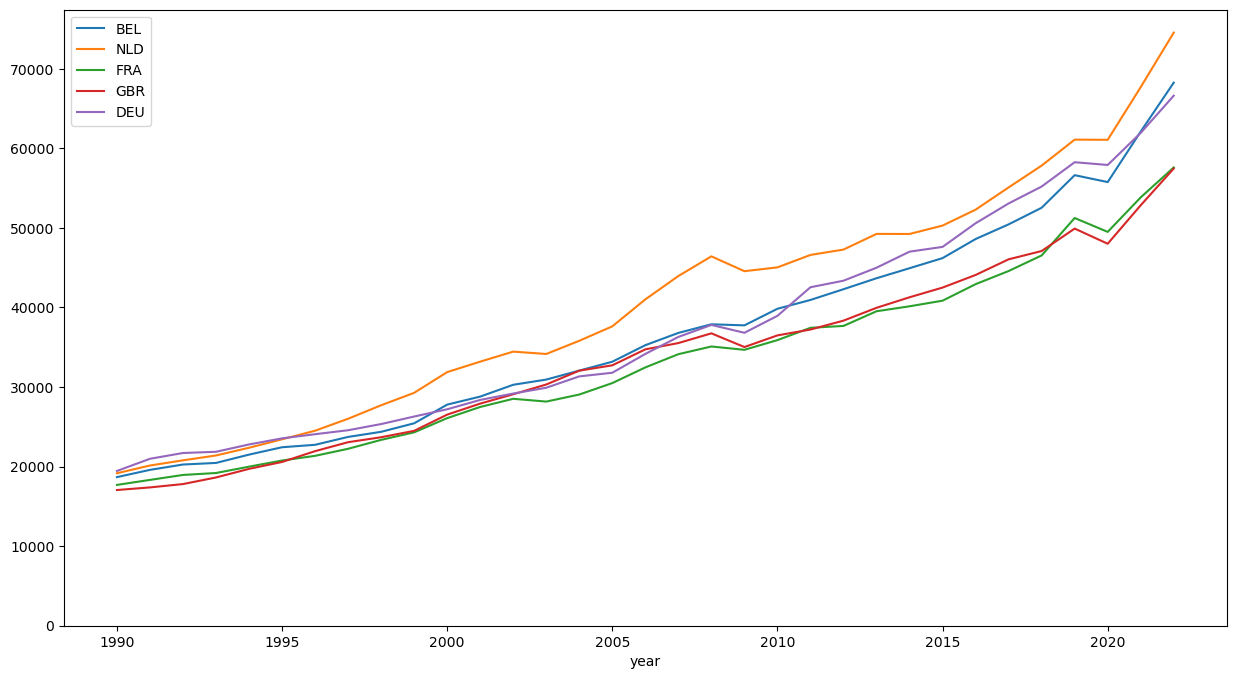

In [21]:
plt.figure(figsize=(15,8))
ax = plt.subplot()
for country_code in 'BEL,NLD,FRA,GBR,DEU'.split(","):
    data[data.country_code == country_code].sort_values(by="year").plot('year','value', ax=ax, label=country_code)

ax.set_ylim(0)
ax.legend()
plt.show()

In [34]:
data = nasdaqdatalink.get_table("WB/DATA", paginate=True, series_id=['NY.GDP.PCAP.PP.CD', 'EN.ATM.CO2E.PC', 'EN.ATM.GHGT.KT.CE', 'EN.ATM.CO2E.PP.GD'], country_code='BEL,NLD,FRA,GBR,DEU')

failed attempt at using FacetGrid. It requires 

```py
import seaborn as sns

def sbplt(series_id, **kwargs):    
    for country_code in 'BEL,NLD,FRA,GBR,DEU'.split(","):
        series = data[(data.country_code == country_code) & (data.series_id == series_id)].sort_values(by="year") # .plot('year','value', ax=ax, label=country_code)
    sns.lineplot(**kwargs)                                  # here I wanted the series data
    
mapper = ['NY.GDP.PCAP.PP.CD', 'EN.ATM.CO2E.PC', 'EN.ATM.GHGT.KT.CE', 'EN.ATM.CO2E.PP.GD']

grid = sns.FacetGrid(data, col='series_id', col_wrap=2)     # this passes the df
grid.map_dataframe(sbplt, mapper)                           # this passes the function arguments
plt.show()
```

In [72]:
series = data[(data.country_code == 'BEL') & (data.series_id == 'NY.GDP.PCAP.PP.CD')].sort_values(by="year")
series.head(3)

,series_id,country_code,country_name,year,value
None,,,,,
164,NY.GDP.PCAP.PP.CD,BEL,Belgium,1990,18675.312195
163,NY.GDP.PCAP.PP.CD,BEL,Belgium,1991,19587.855350
162,NY.GDP.PCAP.PP.CD,BEL,Belgium,1992,20258.547446


The solution would be to reshape the dataframe so all values are named by the series name (which is in the metadata table.) 

In [149]:
ccs = data.country_code.unique()
series_ids = data.series_id.unique()[[0,2]]
labels = ['GDP in $ PPP', 'CO2 emissions (kg per PPP $ of GDP)']

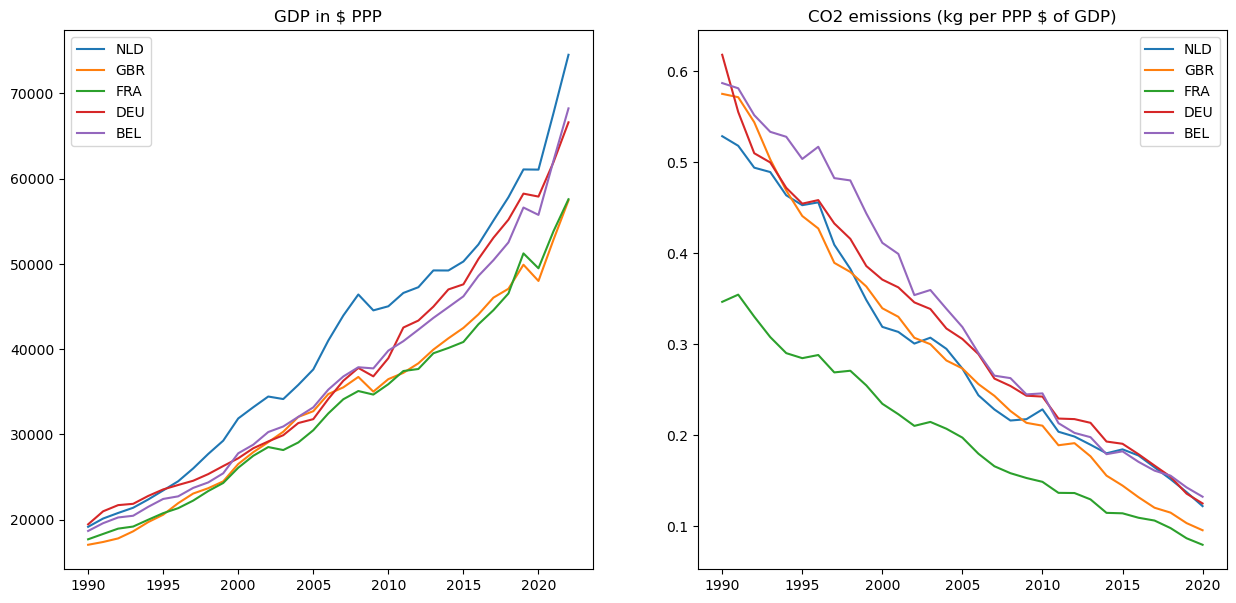

In [150]:
fig, axs = plt.subplots(1,2, figsize=(15,7))

for i, (series, label) in enumerate(zip(series_ids, labels)):
    for country in ccs:        
        df = data[(data.country_code == country) & (data.series_id == series)].sort_values(by="year")
        axs[i].plot(df.year, df.value, label=country)
        
    axs[i].set_title(label)
    axs[i].legend()